In [2]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive')

  PATH_DRIVER = '/content/gdrive/My Drive/'
  DATA_FOLDER = 'Dataset/'

  !pip install fastai pydicom kornia fastcore==1.0.9 --upgrade --quiet
  
  from getpass import getpass
  user = getpass('GitHub user')
  password = getpass('GitHub password')
  import os
  os.environ['GITHUB_AUTH'] = user + ':' + password
  !git clone https://$GITHUB_AUTH@github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

  IN_COLAB = True
except:
  PATH_DRIVER = ''
  DATA_FOLDER = 'data/'
  IN_COLAB = False

In [1]:
import pandas as pd
import numpy as np
import sklearn

import os
import gc

import matplotlib.pyplot as plt

from fastai.basics import *
from fastai.medical.imaging import *

In [3]:
PATH_PREFIX = os.path.join(PATH_DRIVER, DATA_FOLDER, '')
raw_folder = PATH_PREFIX + 'DICOMS'
organize_folder = PATH_PREFIX + 'clasificacion_pendiente'
preprocess_folder = PATH_PREFIX + 'preprocess'

In [4]:
from utils import concat_templates

# df = concat_templates(organize_folder, excel=True)
# df.to_excel(
#     os.path.join(preprocess_folder, 'all.xls'),
#     index=False
# )

df = pd.read_excel(os.path.join(preprocess_folder, 'all.xls'), dtype={'ID':'string','Target':'string'})

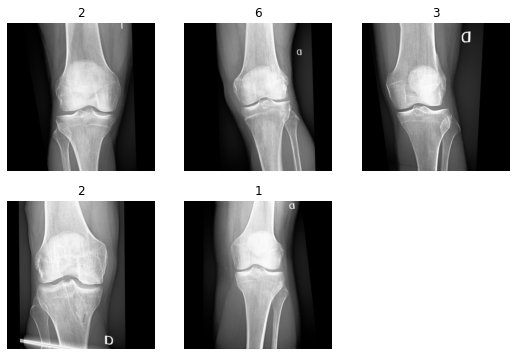

In [5]:
from fastai.data.block import *
from fastai.vision.data import *
from fastai.vision.augment import *
from fastai.data.transforms import *

dls = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=ColReader('ID', pref=preprocess_folder+'/', suff='.png'), 
    get_y=ColReader('Target'),
    splitter=RandomSplitter(),
    item_tfms=Resize(512),
    batch_tfms=[*aug_transforms()],
).dataloaders(df[['ID','Target']], bs=5)

dls.show_batch()